# Bangalore Restaurant Success Analysis
### Business Persona: 
Market Entry Consultant


### Business Problem: 
- The Bangalore restaurant market is highly competitive with over 51,000 establishments. A new restaurant group wants to enter the market but needs to increase the chances to succeed.


### Objective: 
- To identify the "Success Recipe" by analyzing the relationship between location, cost, and service features and their impact on restaurant ratings.

This project aims to provide data-driven recommendations on:
1. Where to open.
2. What to offer.
3. How to price.

- I have imported the dataset from kaggle - https://www.kaggle.com/datasets/himanshupoddar/zomato-bangalore-restaurants

In [ ]:
# PYTHON LIBRARY
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# IGNORE WARNINGS
import warnings
warnings.filterwarnings("ignore")
plt.style.use('dark_background')
df = pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
df.shape

(51717, 17)

In [ ]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

### Data Cleaning 

In [ ]:
df = df.drop(['url','address','phone','menu_item','dish_liked','reviews_list'],axis = 1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [ ]:
def handlerate(value):
    if(value == 'NEW' or value == '-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)

df['rate'] = df['rate'].apply(handlerate)
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [ ]:
df['rate'].fillna(df['rate'].mean())
print(f"Missing Ratings After Cleaning {df['rate'].isnull().sum()}")

Missing Ratings After Cleaning 10052


In [ ]:
location = df['location'].value_counts(ascending=False)
loc_lessthan300 = location[location < 300]

def handle_location(value):
    if value in loc_lessthan300.index:   # use .index (categories)
        return 'others'
    else:
        return value

df['location'] = df['location'].apply(handle_location)
df['location'].value_counts()

location
BTM                      5124
others                   4707
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
Indiranagar              2083
Jayanagar                1926
Marathahalli             1846
Bannerghatta Road        1630
Bellandur                1286
Electronic City          1258
Koramangala 1st Block    1238
Brigade Road             1218
Koramangala 7th Block    1181
Koramangala 6th Block    1156
Sarjapur Road            1065
Ulsoor                   1023
Koramangala 4th Block    1017
MG Road                   918
Banashankari              906
Kalyan Nagar              853
Richmond Road             812
Frazer Town               727
Malleshwaram              725
Basavanagudi              684
Residency Road            675
Banaswadi                 664
Brookefield               658
New BEL Road              649
Kammanahalli              648
Rajajinagar               591
Church Street             569
L

#### Cleaning approx_cost column (it has commas)

In [ ]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).apply(lambda x: x.replace(',','')) 
df['approx_cost(for two people)'].astype(float)

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51712    1500.0
51713     600.0
51714    2000.0
51715    2500.0
51716    1500.0
Name: approx_cost(for two people), Length: 51717, dtype: float64

### Univariate Analysis

#### How many restaurants are there in each location ?

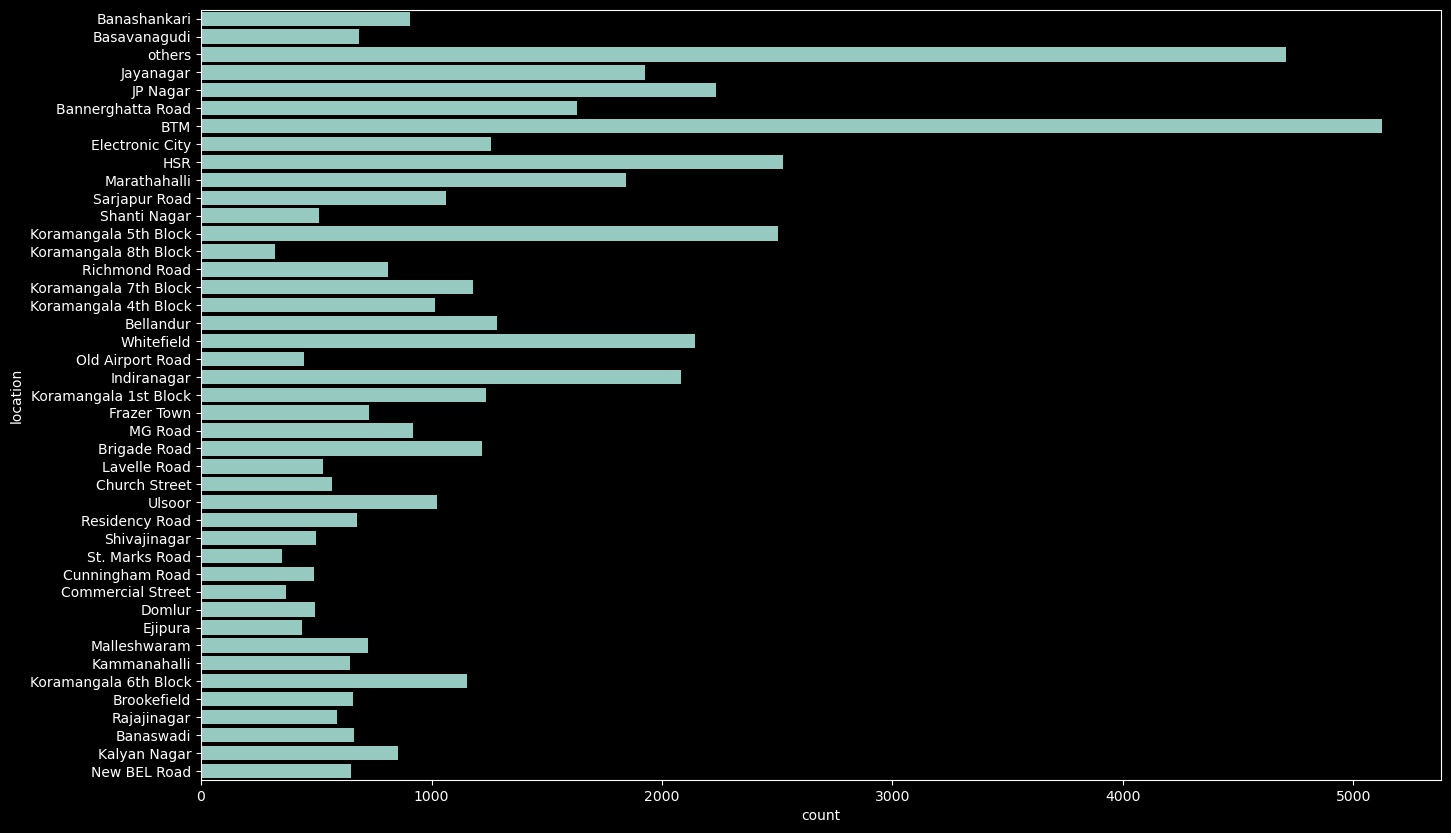

In [ ]:
plt.figure(figsize = (16,10))
ax = sns.countplot(df['location'])

### Insight of count  plot: Approximately 60% of restaurants in Bangalore support online ordering, indicating a highly digital-forward market.

<Axes: xlabel='count', ylabel='online_order'>

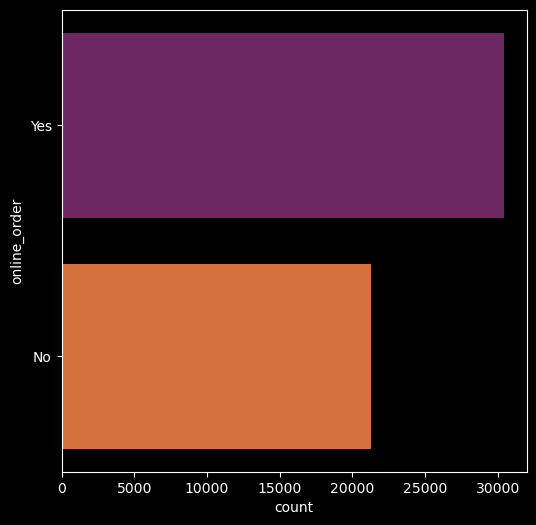

In [ ]:
plt.figure(figsize = (6,6))
sns.countplot(df['online_order'], palette = 'inferno')

### Insight : Only a small fraction of restarant offer table bookings. Representing focus on quick - service models over fine - dining.

<Axes: xlabel='count', ylabel='book_table'>

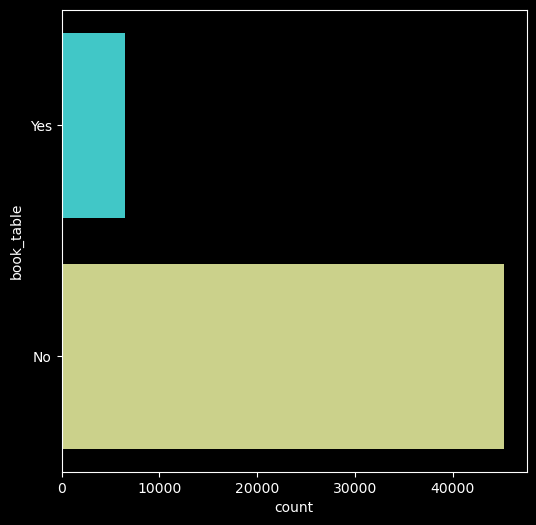

In [ ]:
plt.figure(figsize = (6,6))
sns.countplot(df['book_table'], palette = 'rainbow')

### 2. What is the Benchmark for a 'Good' Restaurant in this Market?

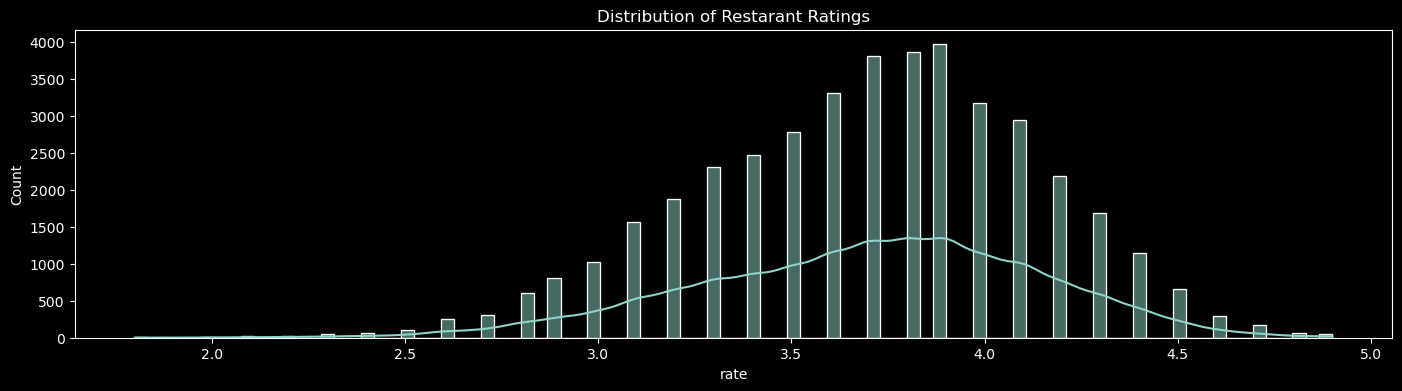

In [ ]:
plt.figure(figsize=(17,4))
sns.histplot(df['rate'],kde = True)
plt.title("Distribution of Restarant Ratings")
plt.show()

### How many restaurants does banglore have as per type ?

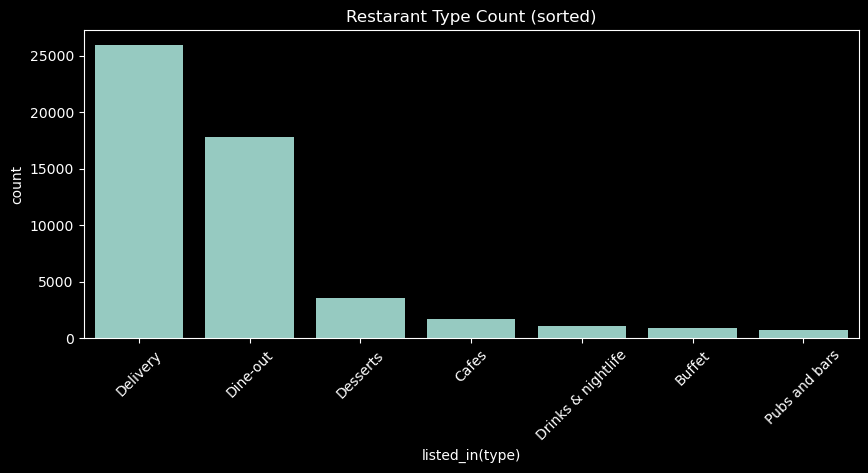

In [ ]:
plt.figure(figsize=(10,4))

order = df['listed_in(type)'].value_counts().index # sorting by count

sns.countplot(data=df, x = ('listed_in(type)'), order = order)

plt.title("Restarant Type Count (sorted)")

plt.xticks(rotation = 45)

plt.show()

### Insight : Delivery and Dine-out has the highest count of restarants in Banglore.

### Bivariate Analysis:
#### A. Does "Online Ordering" impact the Rating?

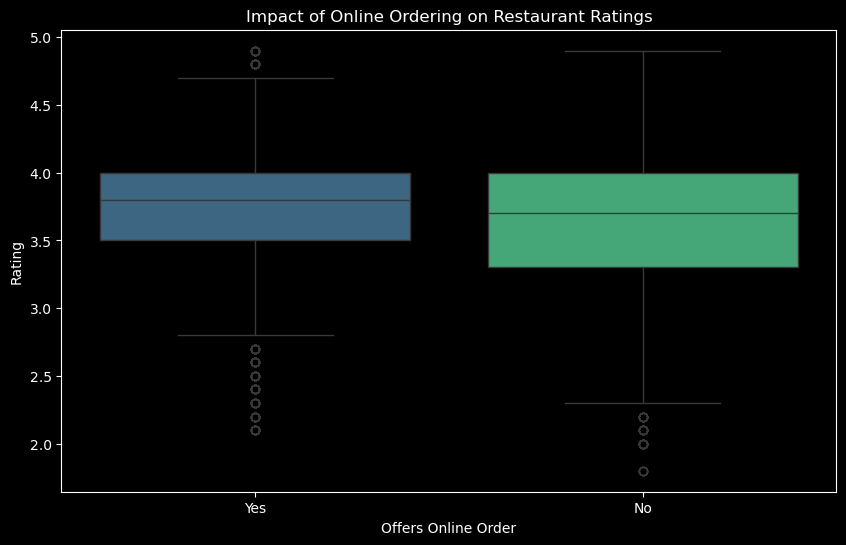

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x ='online_order', y = 'rate', data=df, palette = 'viridis')
plt.title('Impact of Online Ordering on Restaurant Ratings')
plt.xlabel('Offers Online Order')
plt.ylabel('Rating')
plt.show()


#### As the "No" Boxplot is higher it means that offering online delivery is not correlated with higher customer satisfaction in the banglore market

### Does Spending more money guarantee a better experience?


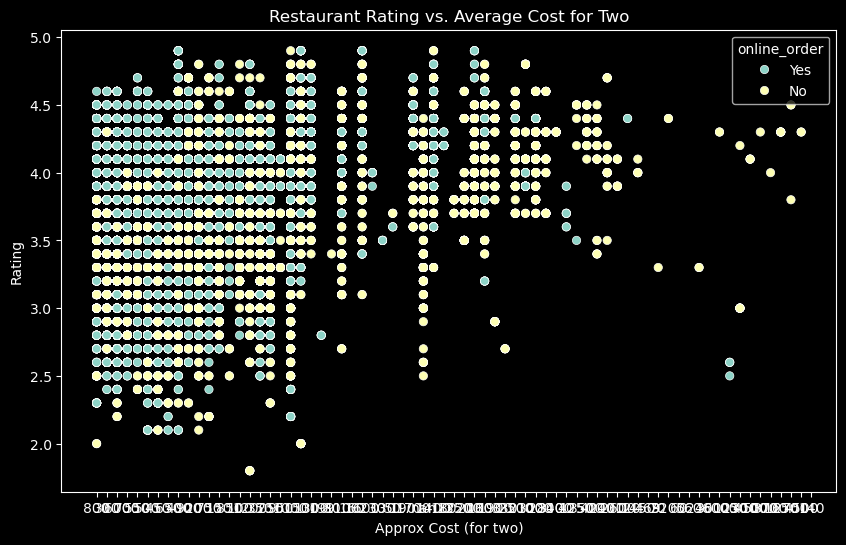

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(x='approx_cost(for two people)',y='rate',hue='online_order',data=df)
plt.title('Restaurant Rating vs. Average Cost for Two')
plt.xlabel('Approx Cost (for two)')
plt.ylabel('Rating')
plt.show()

### Which are the popular location by Ratings in Banglore ?

#### Grouping by location to find average rating and count of restaurants

In [ ]:
loc_stats = df.groupby('location').agg({'rate':'mean', 'name':'count'}).rename(columns = {'name':'count'})


#### Filtering by location with a significant number of restaurants 

In [ ]:
popular_locs = loc_stats[loc_stats['count'] > 700].sort_values(by='rate', ascending = False)

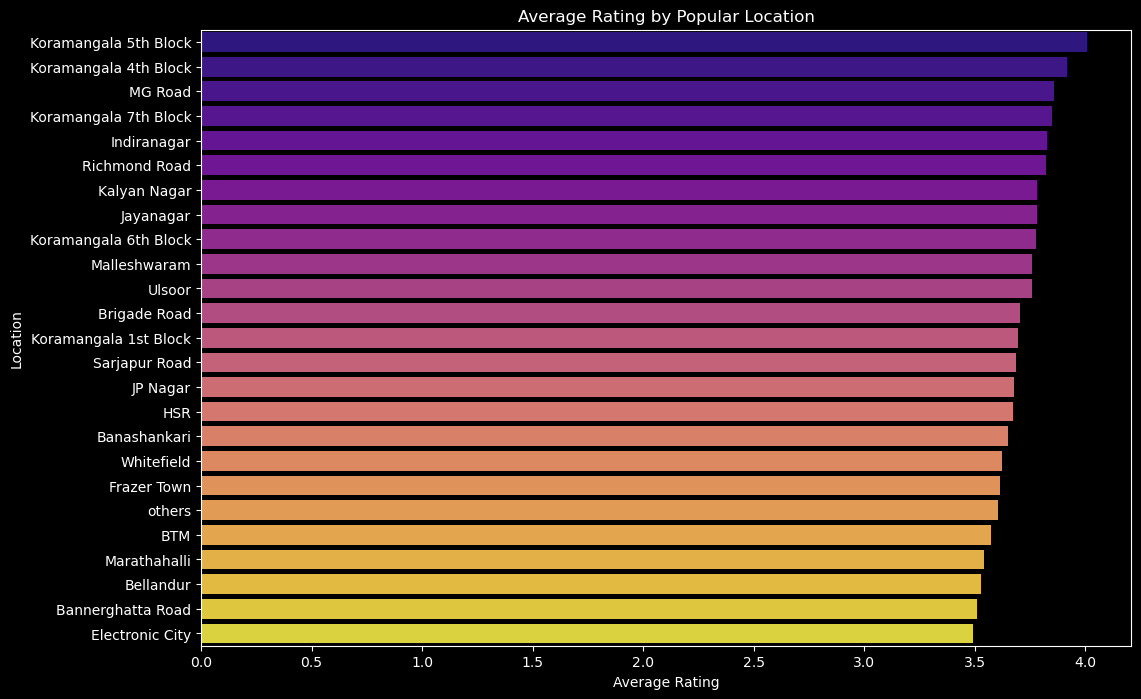

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=popular_locs['rate'], y = popular_locs.index, palette = 'plasma')
plt.title('Average Rating by Popular Location')
plt.xlabel('Average Rating')
plt.ylabel('Location')
plt.show()

### Insight : The top 3 popular locations are -
- koramangala 4th Block
- koramangala 5th Block
- MG Road

### Does Luxury Restaurants have higher ratings?

#### Converting cost to numeric for analysis

In [ ]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).apply(lambda x: x.replace(',',''))
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)

#### Selecting numerical columns for correlation

In [ ]:
numerical_df = df[['rate','votes','approx_cost(for two people)']]
corr = numerical_df.corr()

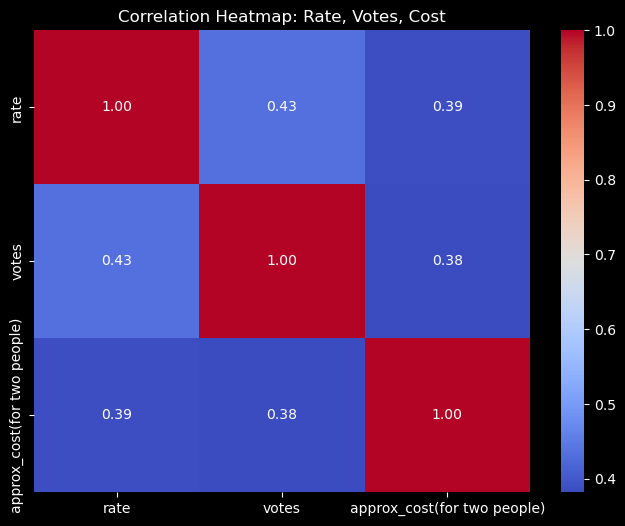

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap: Rate, Votes, Cost")
plt.show()

## Statistical Insights & Business Interpretations
- Positive Correlation Between Votes and Rating (0.43): There is a moderate positive relationship between the number of votes and the restaurant's rating. This suggests that "popular" restaurants (those with more customer engagement) tend to maintain higher quality standards or better brand perception.

- Cost vs. Rating (0.39): There is a weak-to-moderate positive correlation between the average cost for two and the rating. While more expensive restaurants do trend toward higher ratings, the correlation isn't high enough (0.50) to suggest that price alone guarantees customer satisfaction.

- Price and Popularity (0.38): The correlation between cost and votes is relatively low. This indicates that in Bangalore, high-volume customer traffic (votes) is not exclusive to luxury dining; budget-friendly restaurants can be just as popular as high-end ones.

## Strategic Roadmap: Restaurant Market Entry

### Final Business Recommendations based on Data Analysis
After cleaning and analyzing **51,717** restaurant records, I have developed a data-driven entry strategy for new investors.

---

### 1. Location Selection Strategy
- **Avoid Saturation:** Areas like **BTM (5,124 restaurants)** are highly saturated; entering here requires a massive marketing budget to stand out.
- **Target High-Value Zones:** Focus on **Indiranagar**, **Koramangala 5th Block**, and **Whitefield**. These locations show a high concentration of restaurants with a significant number of customer votes, indicating an active, high-spending demographic.
- **The "Others" Opportunity:** Locations with fewer than 300 restaurants were grouped as 'others'. These represent "Blue Ocean" opportunities for neighborhood-focused niche dining.

---

### 2. Operational & Service Model
- **The Delivery Standard:** With a vast majority of the market supporting online orders (~30,000 "Yes"), digital integration is a baseline requirement.
- **Service Differentiator:** Data shows a massive gap in **Table Bookings** (only ~6,000 "Yes" vs ~45,000 "No"). Offering high-quality dine-in service with booking capabilities can help a new brand capture the premium segment.
- **Top Performing Category:** Delivery type dominates the market count (25,000), followed by **Dine-out** (17,500). A hybrid model is essential for survival.

---

### 3. Pricing & Positioning
- **The "Mid-Range" Sweet Spot:** The correlation between cost and rating is **0.39**, which is moderate but not absolute. 
- **Insight:** You do not need to be the most expensive to be the best-rated. Targeting a mid-range price point allows for high-quality perception without pushing away the mass market.

---

### 4. Customer Engagement (Success Driver)
- **Popularity Breeds Success:** The highest correlation in our study was between **Votes** and **Rating (0.43)**. 
- **Actionable Advice:** The business must prioritize customer reviews and engagement. A high volume of votes is a stronger predictor of a high rating than price point alone.
